In [364]:
import pandas as pd
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import re
pd.options.display.max_rows = 500

In [463]:
df = pd.read_csv('h03_data.csv', header=0)

In [464]:
df

,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,start,sequence,class,seq1,seq2,seq3,seq4,seq5,seq6,seq7,seq8
0,plate,bottle,knife,bowl,fork,cup,spoon,glass,left,"'bowl', 'cup', 'spoon', 'fork', 'glass', 'knif...",19,bowl,cup,spoon,fork,glass,knife,bottle,plate
1,glass,bottle,knife,plate,bowl,fork,spoon,cup,left,"'plate', 'bowl', 'spoon', 'fork', 'knife', 'cu...",14,plate,bowl,spoon,fork,knife,cup,glass,bottle
2,spoon,cup,knife,fork,bowl,bottle,glass,plate,left,"'plate', 'bowl', 'glass', 'bottle', 'fork', 'k...",57,plate,bowl,glass,bottle,fork,knife,cup,spoon
3,bottle,plate,bowl,cup,knife,glass,spoon,fork,left,"'glass', 'plate', 'bowl', 'cup', 'knife', 'spo...",17,glass,plate,bowl,cup,knife,spoon,fork,bottle
4,glass,bowl,fork,cup,plate,knife,bottle,spoon,left,"'plate', 'bowl', 'fork', 'knife', 'spoon', 'cu...",6,plate,bowl,fork,knife,spoon,cup,glass,bottle
5,fork,cup,bottle,knife,glass,plate,bowl,spoon,center,"'plate', 'bowl', 'spoon', 'glass', 'knife', 'b...",49,plate,bowl,spoon,glass,knife,bottle,fork,cup
6,glass,bottle,fork,bowl,knife,cup,plate,spoon,left,"'plate', 'bowl', 'cup', 'spoon', 'knife', 'for...",3,plate,bowl,cup,spoon,knife,fork,glass,bottle
7,bottle,fork,spoon,plate,glass,cup,knife,bowl,center,"'plate', 'spoon', 'fork', 'knife', 'bottle', '...",43,plate,spoon,fork,knife,bottle,glass,cup,bowl
8,bowl,plate,spoon,knife,cup,fork,glass,bottle,center,"'plate', 'fork', 'knife', 'spoon', 'cup', 'bot...",29,plate,fork,knife,spoon,cup,bottle,glass,bowl
9,plate,fork,bottle,spoon,glass,knife,bowl,cup,center,"'plate', 'fork', 'spoon', 'knife', 'bottle', '...",37,plate,fork,spoon,knife,bottle,glass,cup,bowl


### Create classes for unique target sequences

In [9]:
# get set of unique sequences
unique_seqs = set(df['sequence'])

# create dict for classes based on unique sequences
classes = {seq: c for c, seq in enumerate(unique_seqs)}

# assign class to new column in df

for row in range(0,len(df)):
    df.loc[row,'class'] = classes[df.loc[row,'sequence']]

In [389]:
#df.to_csv('h03_data.csv', header=True)

### Generate decision tree

In [56]:
X = df.iloc[:,0:9]

In [57]:
y = df['class']

In [58]:
clf = tree.DecisionTreeClassifier()

one_hot_data = pd.get_dummies(X)

clf = clf.fit(one_hot_data,y)

In [67]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=list(one_hot_data.columns),
                               class_names=df['sequence'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('tree')

'tree.pdf'

### Get probabilities for items at each table position

In [333]:
items = ['bottle','bowl','cup','fork','glass','knife','plate','spoon']
columns=['pos1','pos2','pos3','pos4','pos5','pos6','pos7','pos8']

probs_on_table = pd.DataFrame(columns=columns, index=items)

In [334]:
for col in probs_on_table:
    for item in items:
        probs_on_table.loc[item,col] = df[col].value_counts()[item] / len(df[col]) * 100

In [331]:
#probs.to_csv('h03_probabilities_items_positions.csv',header=True,index=True)

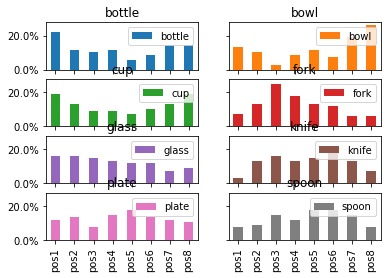

In [335]:
%matplotlib qt

probs_on_table.T.plot.bar(subplots=True, grid=False, legend=False, tick_label=columns,
                layout=(4,2), sharex=True, sharey=True)

[ax.legend(loc=1) for ax in plt.gcf().axes]
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

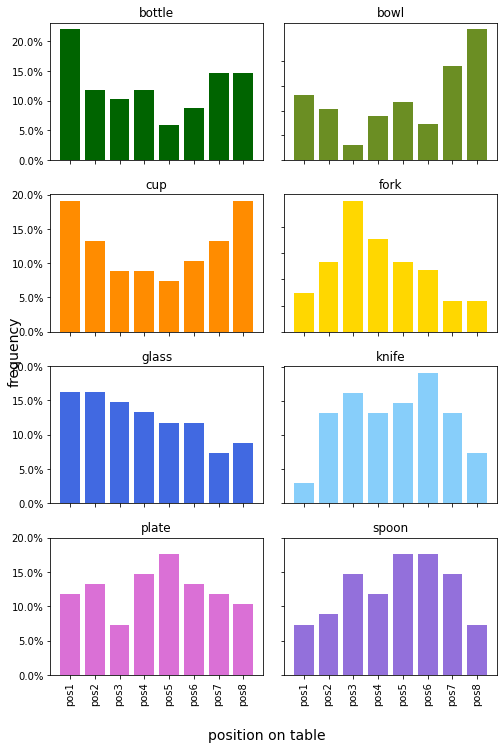

In [336]:
#%matplotlib inline
fig, axs = plt.subplots(4,2)
fig.set_size_inches(8,12)

axs[0,0].bar(np.arange(0,8,1), probs_on_table.T['bottle'], color='darkgreen')
axs[0,1].bar(np.arange(0,8,1), probs_on_table.T['bowl'], color='olivedrab')
axs[1,0].bar(np.arange(0,8,1), probs_on_table.T['cup'], color='darkorange')
axs[1,1].bar(np.arange(0,8,1), probs_on_table.T['fork'], color='gold')
axs[2,0].bar(np.arange(0,8,1), probs_on_table.T['glass'], color='royalblue')
axs[2,1].bar(np.arange(0,8,1), probs_on_table.T['knife'], color='lightskyblue')
axs[3,0].bar(np.arange(0,8,1), probs_on_table.T['plate'], color='orchid')
axs[3,1].bar(np.arange(0,8,1), probs_on_table.T['spoon'], color='mediumpurple')

axs[0,0].set_title('bottle')
axs[0,1].set_title('bowl')
axs[1,0].set_title('cup')
axs[1,1].set_title('fork')
axs[2,0].set_title('glass')
axs[2,1].set_title('knife')
axs[3,0].set_title('plate')
axs[3,1].set_title('spoon')
    
for ax in axs.flat:
    ax.label_outer()
    ax.set_yticks(np.arange(0,25,5))
    ax.set_xticks(range(8))
    ax.set_xticklabels(columns, rotation=90)
    ax.yaxis.set_major_formatter(PercentFormatter(100))

fig.text(0.05, 0.5, 'frequency', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.05, 'position on table', ha='center', fontsize=14)

plt.subplots_adjust(wspace=0.1, hspace=0.25)

plt.show()

### Get frequency for items in sequence position

In [488]:
items = ['bottle','bowl','cup','fork','glass','knife','plate','spoon']
columns_seq = ['seq1','seq2','seq3','seq4','seq5','seq6','seq7','seq8']

probs_in_seq = pd.DataFrame(columns=columns_seq, index=items)

In [489]:
for col in probs_in_seq:
    print(col)
    for item in items:
        print(item)
        try:
            probs_in_seq.loc[item,col] = df[col].value_counts()[item] / len(df[col]) * 100
            print(df[col].value_counts()[item] / len(df[col]) * 100)
        except:
            continue

seq1
bottle
bowl
2.941176470588235
cup
7.352941176470589
fork
2.941176470588235
glass
5.88235294117647
knife
plate
75.0
spoon
5.88235294117647
seq2
bottle
bowl
cup
fork
glass
knife
plate
spoon
seq3
bottle
bowl
cup
fork
glass
knife
plate
spoon
seq4
bottle
bowl
cup
fork
glass
knife
plate
spoon
seq5
bottle
bowl
cup
fork
glass
knife
plate
spoon
seq6
bottle
bowl
cup
fork
glass
knife
plate
spoon
seq7
bottle
bowl
cup
fork
glass
knife
plate
spoon
seq8
bottle
bowl
cup
fork
glass
knife
plate
spoon


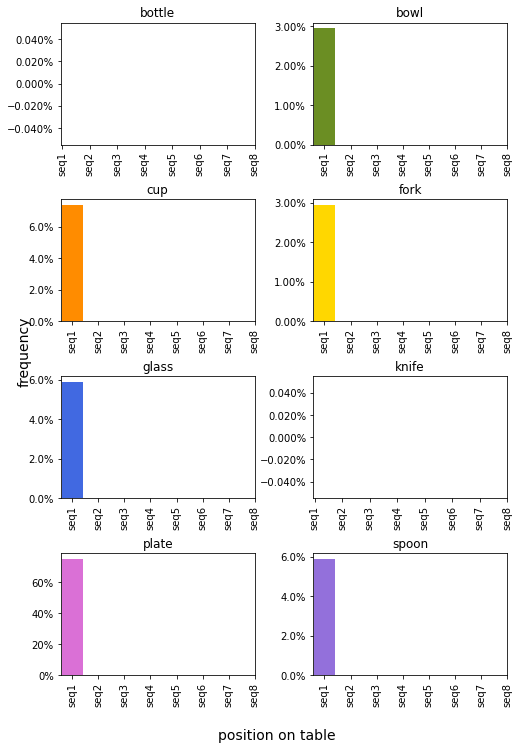

In [477]:
#%matplotlib inline
fig, axs = plt.subplots(4,2)
fig.set_size_inches(8,12)

axs[0,0].bar(np.arange(0,8,1), probs_in_seq.T['bottle'], color='darkgreen')
axs[0,1].bar(np.arange(0,8,1), probs_in_seq.T['bowl'], color='olivedrab')
axs[1,0].bar(np.arange(0,8,1), probs_in_seq.T['cup'], color='darkorange')
axs[1,1].bar(np.arange(0,8,1), probs_in_seq.T['fork'], color='gold')
axs[2,0].bar(np.arange(0,8,1), probs_in_seq.T['glass'], color='royalblue')
axs[2,1].bar(np.arange(0,8,1), probs_in_seq.T['knife'], color='lightskyblue')
axs[3,0].bar(np.arange(0,8,1), probs_in_seq.T['plate'], color='orchid')
axs[3,1].bar(np.arange(0,8,1), probs_in_seq.T['spoon'], color='mediumpurple')

axs[0,0].set_title('bottle')
axs[0,1].set_title('bowl')
axs[1,0].set_title('cup')
axs[1,1].set_title('fork')
axs[2,0].set_title('glass')
axs[2,1].set_title('knife')
axs[3,0].set_title('plate')
axs[3,1].set_title('spoon')
    
for ax in axs.flat:
    #ax.label_outer()
    #ax.set_yticks(np.arange(0,25,5))
    ax.set_xticks(range(8))
    ax.set_xticklabels(columns_seq, rotation=90)
    ax.yaxis.set_major_formatter(PercentFormatter(100))

fig.text(0.05, 0.5, 'frequency', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.05, 'position on table', ha='center', fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.45)

plt.show()

In [498]:
df['pos3'].value_counts()['bowl']

2

In [467]:
probs_in_seq

,seq1,seq2,seq3,seq4,seq5,seq6,seq7,seq8
bottle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowl,2.94118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cup,7.35294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fork,2.94118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glass,5.88235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plate,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spoon,5.88235,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [500]:
df['seq2'].value_counts()

 knife     19
 bowl      12
 fork      10
 plate      8
 cup        8
 bottle     5
 spoon      4
 glass      2
Name: seq2, dtype: int64